# Assignment 2 - Continuous Visualization

Imagine you're a data scientist working for the University of Michigan teaching and learning team, and one of your job responsibilities is to offer instructional advice based on course performance metrics. As part of this activity you might be asked to analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparisons between courses and come up with insights regarding how to enhance residential education across different subjects.

## Question 1 Draw probability density plot (30%)

Your first task is to compare 5 different distributions in three different ways.  The five distributions are as follows:

* a $t$-distribution with 9, 99, 999, and 9999 degrees of freedom with mean 0 and standard deviation 2.

* a normal distribution with mean 0 and standard deviation 2.  

First compare the five distributions using a **probability density plot** within a single figure so that each of the curves is in a different color and line type. 

Next compare the five distributions using a **violin plot** within a single figure so that each of the curves is in a different color. 

Next compare the five distributions using a **box and wiskers** within a single figure so that each of the distributions is in a different color. 

If you need points for your a paticular plot type, take a sample of 500 points.  

Please make a well-designed and well-annotated plots (e.g. visually appealing, titles, labels, etc).  

Hint: You can use the method ".ppf($\cdot$)" to get the density at a point of a scipy distribution.   You might want to use scipy.stats.t, scipy.stats.norm, scipy.stats.norm.rvs, and/or stats.t.rvs.   


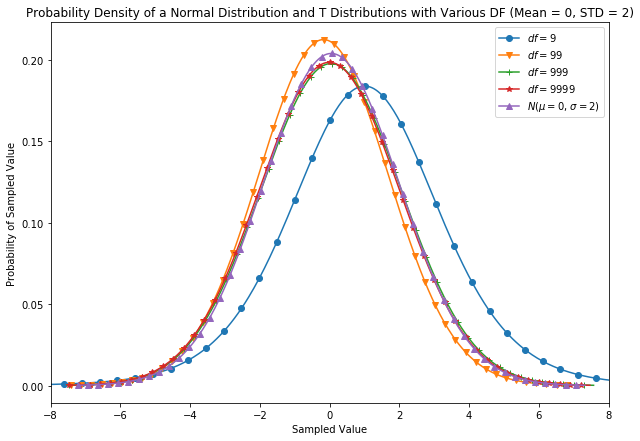

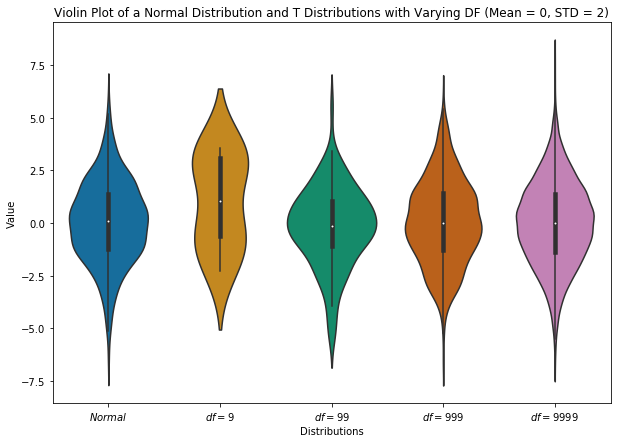

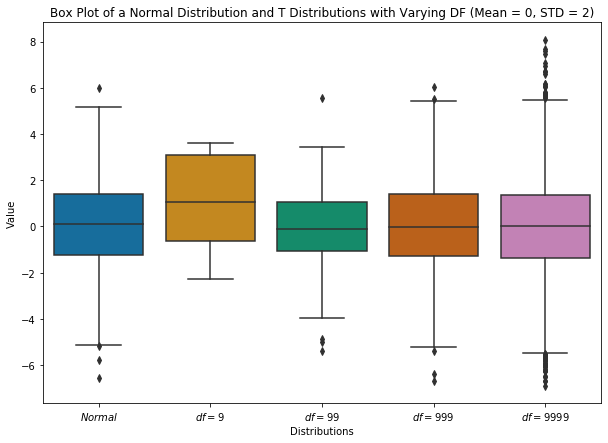

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def make_t_distribution(sample_size, mean, sd):
    t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
    sample_mean = np.mean(t_sample) # sample mean
    sample_std = np.std(t_sample) # sample standard deviation
    t_dist = stats.t(df = sample_size - 1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
    x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 500) # Generate an x-axis based on t-quantile values
    
    return t_dist, x_axis, t_sample

normal_sample = np.random.normal(0, 2, 500)
normal_mean = np.mean(normal_sample) # sample mean
normal_std = np.std(normal_sample) # sample standard deviation
normal_dist = stats.norm(loc = normal_mean, scale = normal_std)

deg_9 = make_t_distribution(10, 0, 2)
deg_99 = make_t_distribution(100, 0, 2)
deg_999 = make_t_distribution(1000, 0, 2)
deg_9999 = make_t_distribution(10000, 0, 2)

def make_prob_plot():

    deg9_x = deg_9[1]
    deg9_y = deg_9[0].pdf(deg9_x)

    deg99_x = deg_99[1]
    deg99_y = deg_99[0].pdf(deg99_x)

    deg999_x = deg_999[1]
    deg999_y = deg_999[0].pdf(deg999_x)

    deg9999_x = deg_9999[1]
    deg9999_y = deg_9999[0].pdf(deg9999_x)

    norm_x = np.linspace(normal_dist.ppf(0.0001), normal_dist.ppf(0.9999), 500) # Generate an x-axis for normal dist
    norm_y = normal_dist.pdf(norm_x)

    plt.figure(figsize = (10, 7))
    plt.xlim(-8, 8)
    plt.plot(deg9_x, deg9_y, label = '$df = 9$', marker = 'o', markevery = 10)
    plt.plot(deg99_x, deg99_y, label = '$df = 99$', marker = 'v', markevery = 10)
    plt.plot(deg999_x, deg999_y, label = '$df = 999$', marker = '+', markevery = 10)
    plt.plot(deg9999_x, deg9999_y, label = '$df = 9999$', marker = '*', markevery = 10)
    plt.plot(norm_x, norm_y, label = '$N(\mu = 0$, $\sigma = 2)$', marker = '^', markevery = 10)
    plt.xlabel('Sampled Value')
    plt.ylabel('Probability of Sampled Value')
    plt.title('Probability Density of a Normal Distribution and T Distributions with Various DF (Mean = 0, STD = 2)')
    plt.legend(loc = 'upper right')
    pdf = plt.show()
    
    return pdf

def make_violin_plot():
    distributions = [normal_sample, deg_9[2], deg_99[2], deg_999[2], deg_9999[2]]
    plt.figure(figsize = (10, 7))
    sns.violinplot(data = distributions, 
        palette = 'colorblind').set_title('Violin Plot of a Normal Distribution and T Distributions with Varying DF (Mean = 0, STD = 2)')
    plt.xlabel('Distributions')
    plt.ylabel('Value')
    plt.xticks([0, 1, 2, 3, 4], ['$Normal$', '$df = 9$', '$df = 99$', '$df = 999$', '$df = 9999$'])
    
    return plt.show()

def make_box_plot():
    distributions = [normal_sample, deg_9[2], deg_99[2], deg_999[2], deg_9999[2]]
    plt.figure(figsize = (10, 7))
    sns.boxplot(data = distributions, 
        palette = 'colorblind').set_title('Box Plot of a Normal Distribution and T Distributions with Varying DF (Mean = 0, STD = 2)')
    plt.xlabel('Distributions')
    plt.ylabel('Value')
    plt.xticks([0, 1, 2, 3, 4], ['$Normal$', '$df = 9$', '$df = 99$', '$df = 999$', '$df = 9999$'])
    
    return plt.show()

make_prob_plot()
make_violin_plot()
make_box_plot()

## Question 2 Grade Distribution Comparison (40%)

Now you have impressed the management team, you have been given a sample data file `assets/class_grades.csv` for a number of courses, and you have been asked to consider the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

You are asked to:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively
* Remove the gaps between the bars in the histograms if any
* For each probability plot, you should overlay a normal distribution with the same mean and standard deviation parameters as you see in the samples (you can calculate this!)
* You should of course use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis

Hints:
* To make subplots, one good way to start with is to use `fig, ax = plt.subplot()`
* To remove the gaps that might show up in histograms, you can customize the `bins` parameter
* If you want to make histograms using the distplot function in seaborn package, you need to specify the parameters `kde = False` and `norm_hist = True`

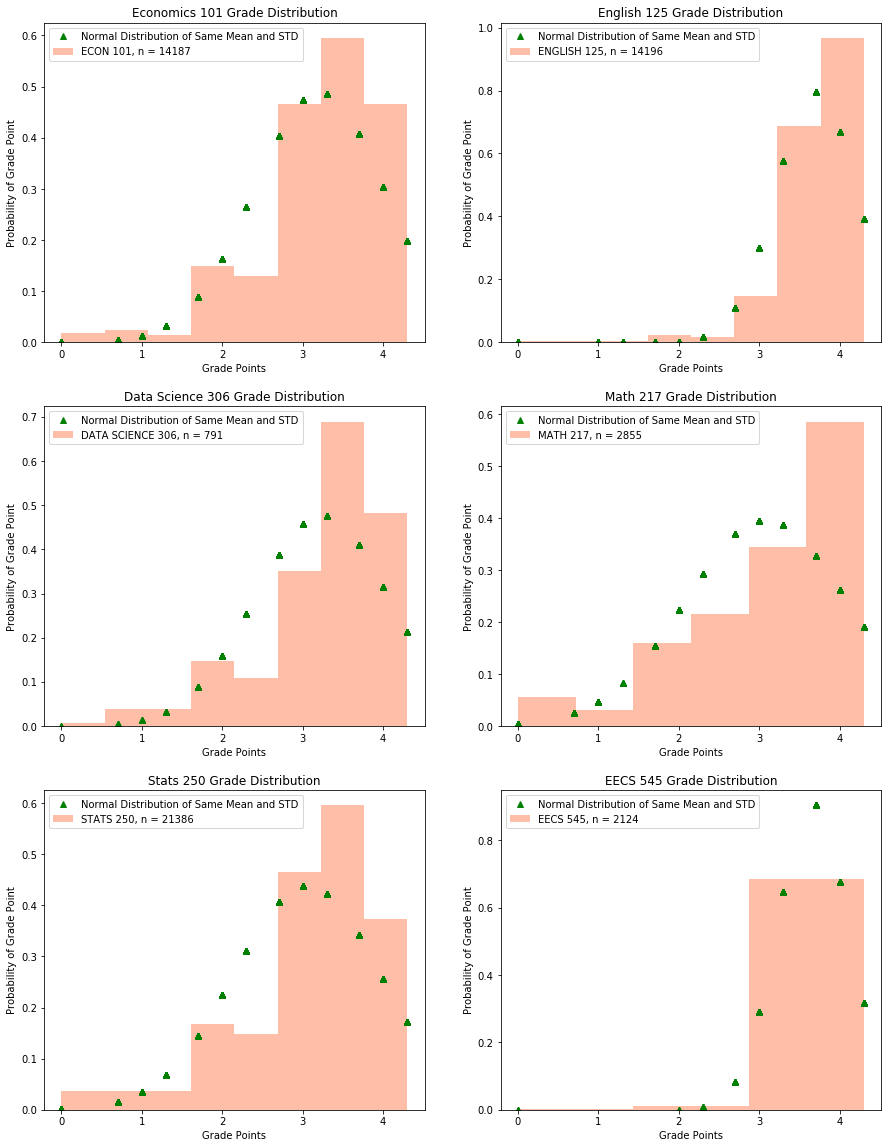

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

grades = pd.read_csv('assets/class_grades.csv').replace({'A+': 4.3, 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3, 
                                                             'B-': 2.7, 'C+': 2.3, 'C': 2, 'C-': 1.7, 'D+': 1.3, 'D': 1, 
                                                             'D-': 0.7, 'E': 0})
econ = np.asarray(grades['ECON101_grade'].dropna())
econ = sorted(econ)
len_econ = len(econ)
fit_econ = stats.norm.pdf(econ, np.mean(econ), np.std(econ))

eng = np.asarray(grades['ENGLISH125_grade'].dropna())
eng = sorted(eng)
len_eng = len(eng)
fit_eng = stats.norm.pdf(eng, np.mean(eng), np.std(eng))

data_sci = np.asarray(grades['DATASCI306_grade'].dropna())
data_sci = sorted(data_sci)
len_data_sci = len(data_sci)
fit_data_sci = stats.norm.pdf(data_sci, np.mean(data_sci), np.std(data_sci))

math = np.asarray(grades['MATH217_grade'].dropna())
math = sorted(math)
len_math = len(math)
fit_math = stats.norm.pdf(math, np.mean(math), np.std(math))

stat = np.asarray(grades['STATS250_grade'].dropna())
stat = sorted(stat)
len_stat = len(stat)
fit_stat = stats.norm.pdf(stat, np.mean(stat), np.std(stat))

eecs = np.asarray(grades['EECS545_grade'].dropna())
eecs = sorted(eecs)
len_eecs = len(eecs)
fit_eecs = stats.norm.pdf(eecs, np.mean(eecs), np.std(eecs))

def grade_distribution():

    fig = plt.figure(figsize=(15, 20))

    econ_sub = fig.add_subplot(3, 2, 1)
    econ_sub.plot(econ, fit_econ, 'g^', label = 'Normal Distribution of Same Mean and STD')
    econ_sub.hist(econ, normed = True, bins = 8, alpha = 0.5, color = 'coral',
         label = 'ECON 101, n = {enrollment}'.format(enrollment = len_econ))
    econ_sub.title.set_text('Economics 101 Grade Distribution')
    econ_sub.set(xlabel='Grade Points', ylabel='Probability of Grade Point')
    econ_sub.legend()

    eng_sub = fig.add_subplot(3, 2, 2)
    eng_sub.plot(eng, fit_eng, 'g^', label = 'Normal Distribution of Same Mean and STD')
    eng_sub.hist(eng, normed = True, bins = 8, alpha = 0.5, color = 'coral',
         label = 'ENGLISH 125, n = {enrollment}'.format(enrollment = len_eng))
    eng_sub.title.set_text('English 125 Grade Distribution')
    eng_sub.set(xlabel='Grade Points', ylabel='Probability of Grade Point')
    eng_sub.legend()

    dat_sub = fig.add_subplot(3, 2, 3)
    dat_sub.plot(data_sci, fit_data_sci, 'g^', label = 'Normal Distribution of Same Mean and STD')
    dat_sub.hist(data_sci, normed = True, bins = 8, alpha = 0.5, color = 'coral',
         label = 'DATA SCIENCE 306, n = {enrollment}'.format(enrollment = len_data_sci))
    dat_sub.title.set_text('Data Science 306 Grade Distribution')
    dat_sub.set(xlabel='Grade Points', ylabel='Probability of Grade Point')
    dat_sub.legend()

    math_sub = fig.add_subplot(3, 2, 4)
    math_sub.plot(math, fit_math, 'g^', label = 'Normal Distribution of Same Mean and STD')
    math_sub.hist(math, normed = True, bins = 6, alpha = 0.5, color = 'coral',
         label = 'MATH 217, n = {enrollment}'.format(enrollment = len_math))
    math_sub.title.set_text('Math 217 Grade Distribution')
    math_sub.set(xlabel='Grade Points', ylabel='Probability of Grade Point')
    math_sub.legend()

    stat_sub = fig.add_subplot(3, 2, 5)
    stat_sub.plot(stat, fit_stat, 'g^', label = 'Normal Distribution of Same Mean and STD')
    stat_sub.hist(stat, normed = True, bins = 8, alpha = 0.5, color = 'coral',
         label = 'STATS 250, n = {enrollment}'.format(enrollment = len_stat))
    stat_sub.title.set_text('Stats 250 Grade Distribution')
    stat_sub.set(xlabel='Grade Points', ylabel='Probability of Grade Point')
    stat_sub.legend()

    eecs_sub = fig.add_subplot(3, 2, 6)
    eecs_sub.plot(eecs, fit_eecs, 'g^', label = 'Normal Distribution of Same Mean and STD')
    eecs_sub.hist(eecs, normed = True, bins = 3, alpha = 0.5, color = 'coral',
         label = 'EECS 545, n = {enrollment}'.format(enrollment = len_eecs))
    eecs_sub.title.set_text('EECS 545 Grade Distribution')
    eecs_sub.set(xlabel='Grade Points', ylabel='Probability of Grade Point')
    eecs_sub.legend()

    return plt.show()

grade_distribution()

# Question 3 Grade Distribution Normality Check (30%)

Seeing the student grade distributions of the 6 large residential courses, the team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, mark observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution).  You may use the annotate tool inside the graph to circle each such instance or design some other manner to call out these points.
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

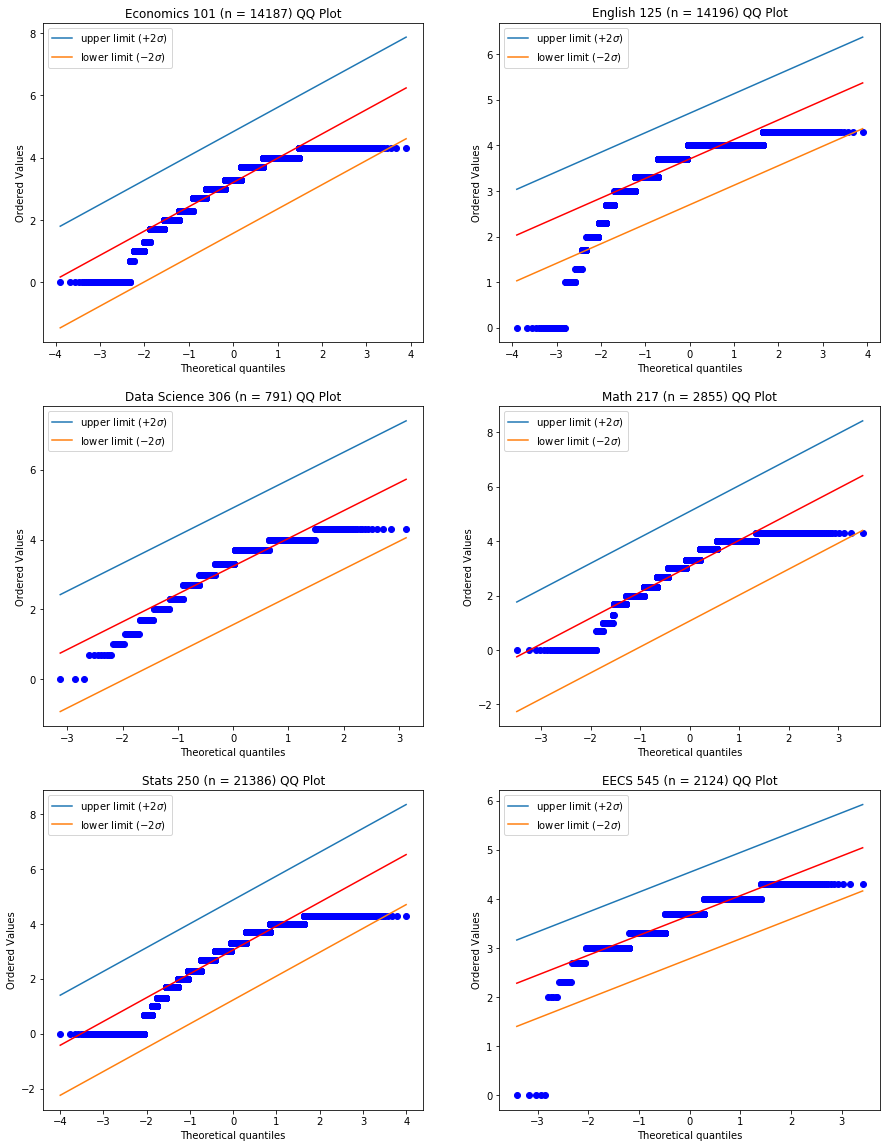

In [3]:
def grade_normality():

    fig_qq = plt.figure(figsize=(15, 20))

    econ_qq = fig_qq.add_subplot(3, 2, 1)
    eng_qq = fig_qq.add_subplot(3, 2, 2)
    dat_qq = fig_qq.add_subplot(3, 2, 3)
    math_qq = fig_qq.add_subplot(3, 2, 4)
    stat_qq = fig_qq.add_subplot(3, 2, 5)
    eecs_qq = fig_qq.add_subplot(3, 2, 6)

    (osm, osr), (slope, intercept, _) = stats.probplot(econ, dist = stats.norm, plot = econ_qq)
    upper_limit = slope * osm + intercept + 2 * np.std(econ)
    lower_limit = slope * osm + intercept - 2 * np.std(econ)
    econ_qq.plot(osm, upper_limit, label = 'upper limit $(+2\sigma)$')
    econ_qq.plot(osm, lower_limit, label = 'lower limit $(-2\sigma)$')
    econ_qq.title.set_text('Economics 101 (n = {enrollment}) QQ Plot'.format(enrollment = len_econ))
    econ_qq.legend()

    (osm, osr), (slope, intercept, _) = stats.probplot(eng, dist = stats.norm, plot = eng_qq)
    upper_limit = slope * osm + intercept + 2 * np.std(eng)
    lower_limit = slope * osm + intercept - 2 * np.std(eng)
    eng_qq.plot(osm, upper_limit, label = 'upper limit $(+2\sigma)$')
    eng_qq.plot(osm, lower_limit, label = 'lower limit $(-2\sigma)$')
    eng_qq.title.set_text('English 125 (n = {enrollment}) QQ Plot'.format(enrollment = len_eng))
    eng_qq.legend()

    (osm, osr), (slope, intercept, _) = stats.probplot(data_sci, dist = stats.norm, plot = dat_qq)
    upper_limit = slope * osm + intercept + 2 * np.std(data_sci)
    lower_limit = slope * osm + intercept - 2 * np.std(data_sci)
    dat_qq.plot(osm, upper_limit, label = 'upper limit $(+2\sigma)$')
    dat_qq.plot(osm, lower_limit, label = 'lower limit $(-2\sigma)$')
    dat_qq.title.set_text('Data Science 306 (n = {enrollment}) QQ Plot'.format(enrollment = len_data_sci))
    dat_qq.legend()

    (osm, osr), (slope, intercept, _) = stats.probplot(math, dist = stats.norm, plot = math_qq)
    upper_limit = slope * osm + intercept + 2 * np.std(math)
    lower_limit = slope * osm + intercept - 2 * np.std(math)
    math_qq.plot(osm, upper_limit, label = 'upper limit $(+2\sigma)$')
    math_qq.plot(osm, lower_limit, label = 'lower limit $(-2\sigma)$')
    math_qq.title.set_text('Math 217 (n = {enrollment}) QQ Plot'.format(enrollment = len_math))
    math_qq.legend()

    (osm, osr), (slope, intercept, _) = stats.probplot(stat, dist = stats.norm, plot = stat_qq)
    upper_limit = slope * osm + intercept + 2 * np.std(stat)
    lower_limit = slope * osm + intercept - 2 * np.std(stat)
    stat_qq.plot(osm, upper_limit, label = 'upper limit $(+2\sigma)$')
    stat_qq.plot(osm, lower_limit, label = 'lower limit $(-2\sigma)$')
    stat_qq.title.set_text('Stats 250 (n = {enrollment}) QQ Plot'.format(enrollment = len_stat))
    stat_qq.legend()

    (osm, osr), (slope, intercept, _) = stats.probplot(eecs, dist = stats.norm, plot = eecs_qq)
    upper_limit = slope * osm + intercept + 2 * np.std(eecs)
    lower_limit = slope * osm + intercept - 2 * np.std(eecs)
    eecs_qq.plot(osm, upper_limit, label = 'upper limit $(+2\sigma)$')
    eecs_qq.plot(osm, lower_limit, label = 'lower limit $(-2\sigma)$')
    eecs_qq.title.set_text('EECS 545 (n = {enrollment}) QQ Plot'.format(enrollment = len_eecs))
    eecs_qq.legend()

    return plt.show()

grade_normality()

In reviewing these QQ plots for each of the six courses, the data does not appear to follow a normal distribution for any class. If the data was following a normal distribution, the blue points (student grades) would have followed the red line (denoting normal distribution) much more tightly. Instead, you often see cases, particularly in the E and A grade range, where there are far more grades in these buckets than would be expected if the data was truly normal. There are some instances for middle grades (D to B) where the data tracks well along the normal distribution, but the tails of these distributions (again, the A and E grades) are far from what would be expected (see Math 217 and Stats 250)